# Geoinsyssoft website recommendation proposal
The approach is to compare all the content in each course that is taken from the Geoinsyssoft website and find the closest course to every other course. This is done by using the tfidf of every course content page. All the course data is scraped using requests and Beautiful soup,argueably the most important packages in python.

In [3]:
#scraping packages
import requests
from bs4 import BeautifulSoup

In [4]:
#get all the course web pages
webpage_search = requests.get("http://www.geoinsyssoft.com/geoinsyssoft-courses-"
                              "training-chennai")
soup_webpage_search = BeautifulSoup(webpage_search.content,"lxml")
line_webpage_search = soup_webpage_search.find_all("a", {"class" :
                                                             "btn btn-primary all_courses_button" })
#print out all the links to the courses
webpage_links = [i["href"] for i in line_webpage_search]
print(webpage_links)

['http://www.geoinsyssoft.com/big-data-hadoop-developer-training-chennai', 'http://www.geoinsyssoft.com/hadoop-administrator-training-chennai', 'http://www.geoinsyssoft.com/big-data-analytics-training-chennai', 'http://www.geoinsyssoft.com/apache-spark-training-chennai', 'http://www.geoinsyssoft.com/informatica-training-chennai', 'http://www.geoinsyssoft.com/datastage-training-chennai', 'http://www.geoinsyssoft.com/abinitio-course-training-chennai', 'http://www.geoinsyssoft.com/oracle-data-integrator-training-chennai', 'http://www.geoinsyssoft.com/oracle-warehouse-builder-training-chennai', 'http://www.geoinsyssoft.com/ssis-training-chennai', 'http://www.geoinsyssoft.com/pentaho-training-chennai', 'http://www.geoinsyssoft.com/informatica-idq-training-chennai', 'http://www.geoinsyssoft.com/sap-business-objects-training-chennai', 'http://www.geoinsyssoft.com/ibm-cognos-training-chennai', 'http://www.geoinsyssoft.com/microstrategy-training-chennai', 'http://www.geoinsyssoft.com/obiee-11-t

In [5]:
#now get all the course labels for the matplotlib visualisation later
labels = [m.rsplit("/",1)[1] for m in webpage_links]
print(len(labels))
print(labels)

28
['big-data-hadoop-developer-training-chennai', 'hadoop-administrator-training-chennai', 'big-data-analytics-training-chennai', 'apache-spark-training-chennai', 'informatica-training-chennai', 'datastage-training-chennai', 'abinitio-course-training-chennai', 'oracle-data-integrator-training-chennai', 'oracle-warehouse-builder-training-chennai', 'ssis-training-chennai', 'pentaho-training-chennai', 'informatica-idq-training-chennai', 'sap-business-objects-training-chennai', 'ibm-cognos-training-chennai', 'microstrategy-training-chennai', 'obiee-11-training-chennai', 'sas-training-chennai', 'ssas-ssrs-training-chennai', 'hyperion-planning-training-chennai', 'hyperion-financial-management-training-chennai', 'qlikview-training-chennai', 'r-training-chennai-statistical', 'tableau-training-chennai', 'jaspersoft-training-chennai', 'mongodb-training-chennai', 'cassandra-training-chennai', 'machine-learning-training-chennai', 'business-analytics-using-python']


Now get all the course content from every course page and add it to a list to be used in the tfidf

In [6]:
docs = []
for i in webpage_links:
    conn = requests.get(i)
    soup = BeautifulSoup(conn.content,"lxml")
    line = soup.find_all("p", {"class" : "text_box_course_content" })
    string = ""
    doc_string = " ".join([i.text for i in line])
    #print(doc_string)
    docs.append(doc_string)

In [7]:
#have a look at a single course, the big data course information
print(docs[1])

What is Big Data ? Big Data Facts The Three V’s of Big Data Understanding Hadoop What is Hadoop ?,Why learn Hadoop ? Relational Databases Vs. Hadoop Motivation for Hadoop 6 Key Hadoop Data Types The Hadoop Distributed File system (HDFS) What is HDFS ? HDFS components Understanding Block storage The Name Node The Data Nodes Data Node Failures HDFS Commands HDFS File Permissions The MapReduce Framework Overview of MapReduce Understanding MapReduce The Map Phase The Reduce Phase WordCount in MapReduce Running MapReduce Job Planning Your Hadoop Cluster Single Node Cluster Configuration Multi-Node Cluster Configuration Checking HDFS Status Breaking the cluster Copying Data Between Clusters Adding and Removing Cluster Nodes Rebalancing the cluster Name Node Metadata Backup Cluster Upgrading Installing and Managing Hadoop Ecosystem Projects Sqoop Flume Hive Pig HBase Oozie Managing and Scheduling Jobs Managing Jobs The FIFO Scheduler The Fair Schedule How to stop and start jobs running on the

Now we feed all the text into a tfidf vectoriser from scikit and get a matrix for pairwise similarity

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer().fit_transform(docs)
# no need to normalize, since Vectorizer will return normalized tf-idf
pairwise_similarity = (tfidf * tfidf.T).A
print(pairwise_similarity)

[[ 1.          0.44461511  0.67948286  0.53683429  0.19359954  0.14553163
   0.1223064   0.16382236  0.18349021  0.18060399  0.15188949  0.00763088
   0.15708709  0.21672602  0.11442444  0.16365044  0.20060118  0.23469551
   0.06153913  0.05409882  0.24030194  0.2107649   0.18003922  0.15446731
   0.25375755  0.16978301  0.23124106  0.24785699]
 [ 0.44461511  1.          0.47673136  0.1720438   0.05813704  0.08508201
   0.10880608  0.14981465  0.10622724  0.13023321  0.08711019  0.00886234
   0.10464428  0.15246205  0.07708982  0.09854955  0.14905459  0.15618319
   0.06779523  0.07019019  0.14565032  0.15215013  0.09678329  0.11076066
   0.13725739  0.1420525   0.05860786  0.17853367]
 [ 0.67948286  0.47673136  1.          0.18704592  0.13638021  0.0964061
   0.09726869  0.12530592  0.14112598  0.15341638  0.1194536   0.01172366
   0.11512086  0.19633743  0.11625628  0.14338812  0.15690293  0.20708133
   0.04988204  0.03726703  0.19467304  0.18343071  0.1584108   0.12454196
   0.226508

Now we view the similarity matrix with matplotlib

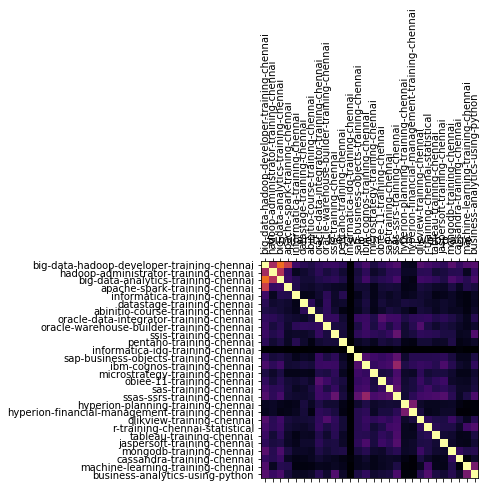

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
cax = ax.matshow(pairwise_similarity, interpolation='nearest',cmap ='inferno')
plt.xticks(range(28), labels, rotation=90)
plt.yticks(range(28), labels)
plt.title('Similarity between each webpage')
plt.show()